# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.054998e+01     6.235703e+00
 * time: 0.0052640438079833984
     1     2.877450e+01     6.348828e+00
 * time: 0.015688180923461914
     2     1.753106e+01     2.968155e+00
 * time: 0.04466819763183594
     3     1.400866e+01     2.988225e+00
 * time: 0.0697011947631836
     4     1.269148e+01     1.855971e+00
 * time: 0.09418916702270508
     5     1.256099e+01     2.076428e+00
 * time: 0.11473417282104492
     6     1.151541e+01     2.515187e+00
 * time: 0.1352691650390625
     7     1.064179e+01     1.168497e+00
 * time: 0.155379056930542
     8     1.020266e+01     8.471232e-01
 * time: 0.17577910423278809
     9     1.002359e+01     6.696461e-01
 * time: 0.196058988571167
    10     9.967049e+00     9.729240e-01
 * time: 0.21120214462280273
    11     9.936711e+00     9.884327e-01
 * time: 0.22653913497924805
    12     9.853871e+00     5.612289e-01
 * time: 0.24191904067993164
    13     9.808320e+00     6.353234e-01
 * time: 0.

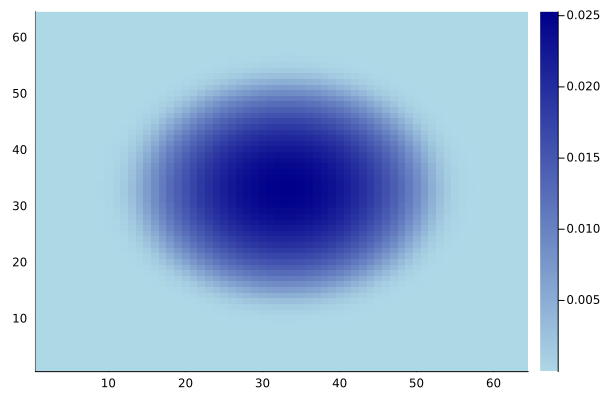

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)